In [122]:
import pandas as pd
import matplotlib.pyplot as plt

### Variables

In [123]:
comunas_rm = [13101,13102,13103,13104,13105,13106,13107,13108,13109,13110,13111,13112,13113,13114,13115,13116,13117,13118, 13119, 13120, 13121,13122,13123,13124,13125,13126,13127,13128,13129,13130,13131,13132]

properties_columns = ['Código SII de la Comuna',
'Número de Manzana',
'Número de Predial',
'Número correlativo de la línea de construcción',
'Código del material estructural de la línea de construcción',
'Código de calidad de la línea de construcción',
'Año de la línea de construcción',
'Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción',
'Código de destino de la línea de construcción',
'Código de condición especial de la línea de construcción']

properties_info_columns = [
'Código SII de la Comuna',
'Número de Manzana',
'Número de Predial',
'Dirección o nombre del predio',
'Avalúo fiscal total',
'Contribución semestral (con aseo)',
'Código de destino principal',
'Avalúo exento de la propiedad',
'Código SII de la Comuna Rol Bien Común 1',
'Número de Manzana Rol Bien Común 1',
'Número de predio Rol Bien Común 1',
'Código SII de la Comuna Rol Bien Común 2',
'Número de Manzana Rol Bien Común 2',
'Número de predio Rol Bien Común 2',
'Superficie total del terreno de la propiedad (sin decimales, en m2)']

## Tratamiento de datos

In [124]:
properties = pd.read_csv('BRORGA2441NL_NAC_2023_2.csv', encoding='latin-1', sep='|')
print(properties)
properties.columns = properties_columns

          01101  00001  00004  0001  B   4  1925  000000631  O Unnamed: 9
0          1101      1      4     2  E   3  1925        201  O        NaN
1          1101      1      4     3  C   3  1925         91  O        NaN
2          1101      1      5     1  B   4  1925        213  O        NaN
3          1101      1      5     2  GB  2  1925         13  V        NaN
4          1101      1      6     1  B   4  1925         69  O        NaN
...         ...    ...    ...   ...  .. ..   ...        ... ..        ...
10441245  16404  90160      6     2  GC  2  1950        520  L        NaN
10441246  16404  90160      6     3  GC  2  1962        240  V        NaN
10441247  16404  90160      6     4  C   4  1962         25  T        NaN
10441248  16404  90160      6     5  E   4  1962         12  V        NaN
10441249  16404  90160      6     6  C   4  2002         59  V        NaN

[10441250 rows x 10 columns]


In [125]:
properties_df = properties.copy()
properties_df['rol'] = properties_df['Número de Manzana'].astype(str) + '-' + properties_df['Número de Predial'].astype(str)
properties_df['CM'] = properties_df['Código SII de la Comuna'].astype(str) + '-' + properties_df['Número de Manzana'].astype(str)
properties_df.set_index(['rol', 'Código SII de la Comuna'], inplace=True)

In [126]:
properties_df

Número de Manzana  Número de Predial  \
rol     Código SII de la Comuna                                         
1-4     1101                                     1                  4   
        1101                                     1                  4   
1-5     1101                                     1                  5   
        1101                                     1                  5   
1-6     1101                                     1                  6   
...                                            ...                ...   
90160-6 16404                                90160                  6   
        16404                                90160                  6   
        16404                                90160                  6   
        16404                                90160                  6   
        16404                                90160                  6   

                                 Número correlativo de la línea de construcción  \
rol     Código SII de la Comuna                                                   
1-4     1101                                                                  2   
        1101                                                                  3   
1-5     1101                                                                  1   
        1101                                                                  2   
1-6     1101                                                                  1   
...                                                                         ...   
90160-6 16404                                                                 2   
        16404                                                                 3   
        16404                                                                 4   
        16404                                                                 5   
        16404                                                                 6   

                                Código del material estructural de la línea de construcción  \
rol     Código SII de la Comuna                                                               
1-4     1101                                                                    E             
        1101                                                                    C             
1-5     1101                                                                    B             
        1101                                                                    GB            
1-6     1101                                                                    B             
...                                                                            ...            
90160-6 16404                                                                   GC            
        16404                                                                   GC            
        16404                                                                   C             
        16404                                                                   E             
        16404                                                                   C             

                                 Código de calidad de la línea de construcción  \
rol     Código SII de la Comuna                                                  
1-4     1101                                                                 3   
        1101                                                                 3   
1-5     1101                                                                 4   
        1101                                                                 2   
1-6     1101                                                                 4   
...                                                                        ...   
90160-6 16404                                                                2   
        16404                

In [127]:
properties_info = pd.read_csv('BRORGA2441N_NAC_2023_2.csv', encoding='latin-1', sep='|')
properties_info.columns =  properties_info_columns

In [128]:
properties_info.head()

,Código SII de la Comuna,Número de Manzana,Número de Predial,Dirección o nombre del predio,Avalúo fiscal total,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
0,1101,1,5,M LIRA 315,140818898,0,O,140818898,0,0,0,0,0,0,566
1,1101,1,6,M LIRA 315,39537563,0,O,39537563,0,0,0,0,0,0,126
2,1101,1,8,M LIRA S/N TERMINAL PESQUERO,1934907470,10322732,C,0,0,0,0,0,0,0,8025
3,1101,1,10,MAXIMO LIRA 389,830168525,4428950,O,0,0,0,0,0,0,0,1588
4,1101,1,12,TERMINAL PESQUERO,56253026,0,C,56253026,0,0,0,0,0,0,211


In [129]:
properties_info_df = properties_info.copy()
properties_info_df['rol'] = properties_info_df['Número de Manzana'].astype(str) + '-' + properties_info_df['Número de Predial'].astype(str)
properties_info_df['CM'] = properties_info_df['Código SII de la Comuna'].astype(str) + '-' + properties_info_df['Número de Manzana'].astype(str)
properties_info_df.set_index(['rol', 'Código SII de la Comuna'], inplace=True)

In [130]:
properties_info_df

,,Número de Manzana,Número de Predial,Dirección o nombre del predio,Avalúo fiscal total,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)",CM
rol,Código SII de la Comuna,,,,,,,,,,,,,,,
1-5,1101,1,5,M LIRA 315,140818898,0,O,140818898,0,0,0,0,0,0,566,1101-1
1-6,1101,1,6,M LIRA 315,39537563,0,O,39537563,0,0,0,0,0,0,126,1101-1
1-8,1101,1,8,M LIRA S/N TERMINAL PESQUERO,1934907470,10322732,C,0,0,0,0,0,0,0,8025,1101-1
1-10,1101,1,10,MAXIMO LIRA 389,830168525,4428950,O,0,0,0,0,0,0,0,1588,1101-1
1-12,1101,1,12,TERMINAL PESQUERO,56253026,0,C,56253026,0,0,0,0,0,0,211,1101-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087-27,16404,5087,27,G MARTINEZ V 217,15257408,0,H,15257408,0,0,0,0,0,0,78,16404-5087
5087-28,16404,5087,28,G MARTINEZ V 221,15257408,0,H,15257408,0,0,0,0,0,0,78,16404-5087
5087-29,16404,5087,29,G MARTINEZ V 225,15257408,0,H,15257408,0,0,0,0,0,0,78,16404-5087


In [131]:
properties_result = pd.merge(properties_df, properties_info_df, on=['rol', 'Código SII de la Comuna'], how='inner')

In [132]:
properties_result

Número de Manzana_x  Número de Predial_x  \
rol     Código SII de la Comuna                                             
1-5     1101                                       1                    5   
        1101                                       1                    5   
1-6     1101                                       1                    6   
        1101                                       1                    6   
1-8     1101                                       1                    8   
...                                              ...                  ...   
90160-6 16404                                  90160                    6   
        16404                                  90160                    6   
        16404                                  90160                    6   
        16404                                  90160                    6   
        16404                                  90160                    6   

                                 Número correlativo de la línea de construcción  \
rol     Código SII de la Comuna                                                   
1-5     1101                                                                  1   
        1101                                                                  2   
1-6     1101                                                                  1   
        1101                                                                  2   
1-8     1101                                                                  1   
...                                                                         ...   
90160-6 16404                                                                 2   
        16404                                                                 3   
        16404                                                                 4   
        16404                                                                 5   
        16404                                                                 6   

                                Código del material estructural de la línea de construcción  \
rol     Código SII de la Comuna                                                               
1-5     1101                                                                    B             
        1101                                                                    GB            
1-6     1101                                                                    B             
        1101                                                                    E             
1-8     1101                                                                    C             
...                                                                            ...            
90160-6 16404                                                                   GC            
        16404                                                                   GC            
        16404                                                                   C             
        16404                                                                   E             
        16404                                                                   C             

                                 Código de calidad de la línea de construcción  \
rol     Código SII de la Comuna                                                  
1-5     1101                                                                 4   
        1101                                                                 2   
1-6     1101                                                                 4   
        1101                                                                 3   
1-8     1101                                                                 3   
...                                                                        ...   
90160-6 16404                                              

In [133]:
comuna_columns = [col for col in properties_result.columns if 'Código SII de la Comuna' in col]
conditions = (properties_result[comuna_columns[0]].isin(comunas_rm))
for col in comuna_columns[1:]:
    conditions = conditions | (properties_result[col].isin(comunas_rm))
properties_result = properties_result[conditions]

In [134]:
properties_result = properties_result[properties_result['Código de destino principal'] == 'G']
properties_result

Número de Manzana_x  Número de Predial_x  \
rol      Código SII de la Comuna                                             
1-131    13101                                      1                  131   
1-132    13101                                      1                  132   
1-133    13101                                      1                  133   
1-134    13101                                      1                  134   
1-135    13101                                      1                  135   
...                                               ...                  ...   
1780-377 13101                                   1780                  377   
         13101                                   1780                  377   
1923-65  13101                                   1923                   65   
         13101                                   1923                   65   
1923-426 13101                                   1923                  426   

                                  Número correlativo de la línea de construcción  \
rol      Código SII de la Comuna                                                   
1-131    13101                                                                 1   
1-132    13101                                                                 1   
1-133    13101                                                                 1   
1-134    13101                                                                 1   
1-135    13101                                                                 1   
...                                                                          ...   
1780-377 13101                                                                 1   
         13101                                                                 2   
1923-65  13101                                                                 1   
         13101                                                                 2   
1923-426 13101                                                                 1   

                                 Código del material estructural de la línea de construcción  \
rol      Código SII de la Comuna                                                               
1-131    13101                                                                   B             
1-132    13101                                                                   B             
1-133    13101                                                                   B             
1-134    13101                                                                   B             
1-135    13101                                                                   B             
...                                                                             ...            
1780-377 13101                                                                   B             
         13101                                                                   B             
1923-65  13101                                                                   B             
         13101                                                                   B             
1923-426 13101                                                                   B             

                                  Código de calidad de la línea de construcción  \
rol      Código SII de la Comuna                                                  
1-131    13101                                                                3   
1-132    13101                                                                3   
1-133    13101                                                                3   
1-134    13101                                                                3   
1-135    13101                                                                3   
...                                                                         ...   
1780-377 1310

### Descripción DF


In [135]:
properties_result.describe()

,Número de Manzana_x,Número de Predial_x,Número correlativo de la línea de construcción,Código de calidad de la línea de construcción,Año de la línea de construcción,"Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción",Número de Manzana_y,Número de Predial_y,Avalúo fiscal total,Contribución semestral (con aseo),Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,6.190000e+02,6.190000e+02,619.0,619.0,619.000000,619.000000,619.0,619.0,619.0,619.000000
mean,764.759289,303.634895,1.334410,2.621971,1990.912763,92.815832,764.759289,303.634895,3.199112e+08,1.706372e+06,0.0,13101.0,763.239095,90102.285945,0.0,0.0,0.0,1.701131
std,700.413187,214.629746,0.628062,0.517558,115.767072,476.200644,700.413187,214.629746,1.645655e+09,8.779632e+06,0.0,0.0,700.942895,210.866806,0.0,0.0,0.0,24.395995
min,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.434977e+07,2.856200e+04,0.0,13101.0,1.000000,90001.000000,0.0,0.0,0.0,0.000000
25%,138.000000,132.000000,1.000000,2.000000,2002.000000,20.000000,138.000000,132.000000,4.312354e+07,2.296420e+05,0.0,13101.0,138.000000,90001.000000,0.0,0.0,0.0,0.000000
50%,454.000000,294.000000,1.000000,3.000000,2009.000000,34.000000,454.000000,294.000000,5.314770e+07,2.835440e+05,0.0,13101.0,429.000000,90001.000000,0.0,0.0,0.0,0.000000
75%,1713.000000,424.000000,2.000000,3.000000,2010.000000,46.000000,1713.000000,424.000000,6.886398e+07,3.673900e+05,0.0,13101.0,1713.000000,90038.000000,0.0,0.0,0.0,0.000000
max,1923.000000,867.000000,6.000000,4.000000,2013.000000,7565.000000,1923.000000,867.000000,1.686733e+10,8.998721e+07,0.0,13101.0,1923.000000,90799.000000,0.0,0.0,0.0,351.000000


In [136]:
properties_result['Código del material estructural de la línea de construcción'].value_counts()

B     584
C      25
A       8
W       1
P       1
Name: Código del material estructural de la línea de construcción, dtype: int64

In [137]:
properties_result['Año de la línea de construcción'].value_counts().sort_index()

0         2
1929     12
1943      7
1945     19
1946      5
1948      2
1955     48
1956      3
1958     10
1961      2
1965      1
1966      1
1980      1
1981     12
1984      1
1987      2
1988      1
1996      3
1998     20
1999      2
2002      3
2003      6
2004     23
2005      2
2006      3
2007     23
2008     67
2009    140
2010    125
2011      4
2012     32
2013     37
Name: Año de la línea de construcción, dtype: int64

In [138]:
properties_result['Código de destino principal'].value_counts()


G    619
Name: Código de destino principal, dtype: int64

In [141]:
properties_result = properties_result.reset_index()

distribucion = properties_result.groupby(['Año de la línea de construcción', 'Código SII de la Comuna']).size().unstack()
distribucion.head()

Código SII de la Comuna,13101
Año de la línea de construcción,
0,2
1929,12
1943,7
1945,19
1946,5


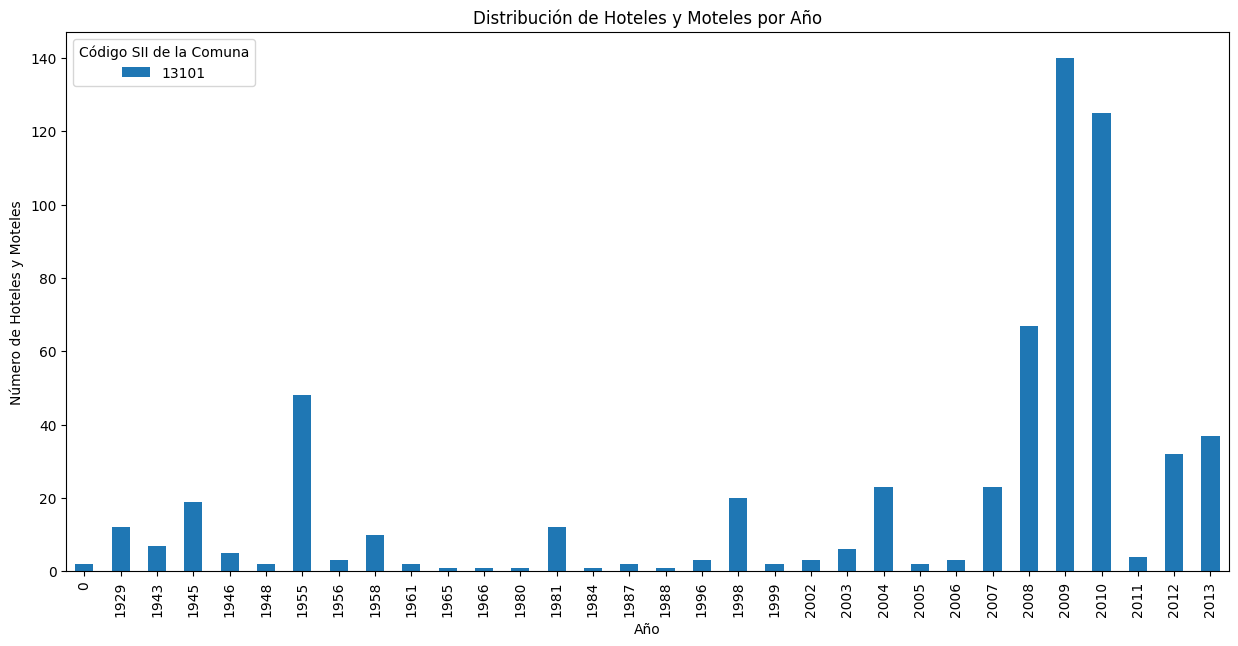

In [147]:
distribucion.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Distribución de Hoteles y Moteles por Año')
plt.ylabel('Número de Hoteles y Moteles')
plt.xlabel('Año')
plt.show()